# **Proyecto Handwritten Digits Classification**

> Tópicos: Análisis exploratorio de datos (EDA), Visualización de datos, Preparación de datos, Standard Scaler, Fine Tuning.

> Librerías: Scikit-Learn, Pandas, Matplotlib, Numpy

> Modelos: Stochastic Gradient Descent (SGD), Random Forest Classifier, one-versus-all (OvA), one-versus-one (OvO), K-Neighbors Classifier.

> Métricas: Accuracy, Precision, Recall, Cross-validation, Matriz de confusión, Curva ROC, F1 Score.

El presente notebook busca replicar el proyecto de clasificación de dígitos escritos a mano basándose en el libro "Hands-on Machine Learning with
Scikit-Learn, Keras and TensorFlow" de Aurélien Géron.
<br><br> Es importante mencionar que este notebook no pretende obtener ningún beneficio económico sino solo busca poner en práctica los conocimientos adquiridos del libro en mención.

## **Primera parte - Comprender el panorama general del proyecto**

Un equipo de trabajo tiene como objetivo automatizar el reconocimento de dígitos, escritos a mano por personas, en documentos de registro de servicios para digitalizarlos en su sistema.
<br>
El equipo requiere clasificar los digitos presentes en la documentación, por ello, se determina que un modelo de clasificación puede automatizar tal requerimiento.

Con estos datos podemos determinar, inicialmente, que se trata de un problema de aprendizaje supervisado para el cual se utilizará un modelo de clasificación



univariante (*univariate regression*) en batch.  Además, se puede estimar el rendimiento del modelo mediante la raíz del error cuadrático medio (RMSE, por sus siglas en inglés) utilizada para problemas de regresión.

## **Segunda parte - Obtener los datos**

### Descarga de los datos

La librería Scikit-Learn brinda un catálogo diverso de datasets populares listos para utilizar.
<br> Uno de los datasets disponibles es MNIST. Este dataset contiene 70 mil pequeñas imágenes de dígitos escritos a mano por estudiantes de secundaria y empleados de la oficina del censo de Estados Unidos.

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Revisión general de la estructura de datos

La estructura de directorios de los datasets cargados desde Scikit-Learn incluye las siguientes características:

*   Una llave 'DESCR' que describe el dataset.
*   Una llave 'data' que contiene un array con una fila por instancia y una columna por feature.
*   Una llave 'target' que contiene un array con las etiquetas (labels).

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]

In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cada imagen tiene un tamaño de 28x28 píxeles, por ello, cada una de las 70 mil imágenes cuenta con 748 features (28 x 28). Asimismo, cada pixel tiene un valor de intensidad en un rango entre 0 y 255 que representan al color blanco y negro, respectivamente.

Para visualizar una imagen del dataset, se toma un vector de features de una instancia, se redimensiona a un array de 28x28 y se muestra en pantalla mediante la librería Matplotlib.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
digito = X.values[0,:]

In [ ]:
digito

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
imagen_digito = digito.reshape(28, 28)

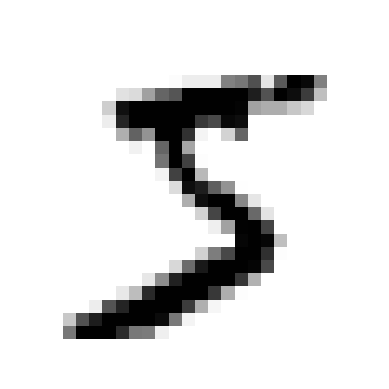

In [ ]:
plt.imshow(imagen_digito, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [ ]:
y[0]

'5'

In [ ]:
import numpy as np

In [ ]:
y = y.astype(np.uint8) # convertir etiqueta string a int
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [ ]:
print(type(y))

<class 'pandas.core.series.Series'>


In [ ]:
y.unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

In [ ]:
y.value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

### Conjunto de evaluación (Test Set)

El dataset MNIST ya esta separado en un set de entrenamiento y un set de evaluación con 60000 y 10000 imágenes, respectivamente. Un dato importante a saber es que la librería realiza un shuffle de los datos de entrenamiento con el que garantiza que los folds de cross-validation sean similares.

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## **Tercera parte - Seleccionar y entrenar un modelo**

### Entrenamiento y evaluación en el conjunto de entrenamiento (Training Set)

#### Clasificadores Binarios

#### Clasificador Stochastic Gradient Descent (SGD)

Primero, se afronta el problema con un clasificador binario básico para un solo dígito el cual reconoce 2 clases. En este caso, se usa el clasificador Stochastic Gradient Descent (SGD) mediante la librería Scikit-Learn. Este clasificador es muy eficiente manejando datasets muy grandes.

In [ ]:
y_train_5 = (y_train == 5) # True para los dígitos 5, False para los demás dígitos
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
digito_2 = X.values[2,:]

In [ ]:
sgd_clf.predict([digito_2]) # etiqueta = 2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [ ]:
sgd_clf.predict([digito]) # etiqueta = 5

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

#### Accuracy usando Cross-validation

El método K-fold cross-validation de la librería Scikit-Learn permite separar el conjunto de entrenamiento en K subsets y luego evaluarlo en el modelo en K veces y, a su vez, tomar un subset diferente y evaluarlo en los K-1 subsets restantes.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

El accuracy (precisión) sobre cada uno de los 3 folds es mayor a 93%. Para verificar este resultado, se crea un clasificador básico que clasifica cada imagen en una clase que no repersenta al dígito número 5.

In [ ]:
from sklearn.base import BaseEstimator

In [ ]:
class Never5Classifier(BaseEstimator):
  def fit(self, X, y = None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype = bool)

In [ ]:
never_5_clf = Never5Classifier()

In [ ]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring = "accuracy")

array([0.91125, 0.90855, 0.90915])

El resultado muestra un accuracy mayor a 90%. Sin embargo, no es una predicción de clasificación ya que aproximadamente el 10% de las imágenes pertenecen al dígito 5.

In [ ]:
y.value_counts(normalize = True)

class
1    0.112529
7    0.104186
3    0.102014
2    0.099857
9    0.099400
0    0.098614
6    0.098229
8    0.097500
4    0.097486
5    0.090186
Name: proportion, dtype: float64

Accuracy no es una buena métrica para medir el rendimiento de un clasificador, especialmente en casos donde existen clases con mayor frecuencia que otras en el dataset (skewed datasets).

#### Matriz de confusión

Un mejor método para evaluar el rendiemiento de un clasificador es la matriz de confusión. Esta matriz permite visualizar las instancias correctamente clasificadas y las instancias erróneamente clasificadas por el algoritmo en base a las etiquetas de los datos de entrenamiento.

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

La primera fila considera imágenes que no son el dígito 5 donde 53892 son clasificadas correctamente como dígito que no es 5 (verdadero negativo) mientras que las 687 imágenes restantes fueron clasificadas erróneamente como dígito 5 (falso positivo).
<br>
La segunda fila considera imágenes que si son el dígito 5 donde 1891 son clasificadas erróneamente como dígito que no es 5 (falso negativo) mientras que las 3530 imágenes restantes fueron clasificadas correctamente como dígito 5 (verdadero positivo).

#### Precision y Recall

La métrica Precision permite reconocer la precisión de las predicciones positivas.
<br>
**Precision = TP / (TP + FP)**

La métrica Recall (sensitivity) permite reconocer el ratio de instancias positivas que fueron clasificadas correctamente.
<br>
**RECALL = TP / (TP + FN)**

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

Estas métricas no llegan al 90% como los resultados del accuracy.
<br>
Estos resultados representan lo siguiente:
*   El clasificar considera un 83% de las veces que una imagen representa un 5.
*   El clasificar sólo detecta el 65% de los 5.

La métrica F1 Score combina las métricas Precision y Recall considerando su media armónica.
<br>
**F1 Score = TP / ( TP + ((FN + FP)/2) )**

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

Precision/Recall Tradeoff

F1 Score favorece los clasificadores que tienen un Precision y Recall similares. Generalmente, esto no es conveniente ya que se puede priorizar el Precision o Recall depende al problema que se afronte. Por lo tanto, al incrementar el Precision se reduce el Recall y viceversa. A esto se le conoce como Precision/Recall tradeoff.

El clasificador SGD realiza sus clasificaciones en base a un valor de umbral (threshold) donde, al pasar el valor del umbral se clasifica como una clase positiva o, de lo contrario, se clasifica como una clase negativa.
<br>
En base a las métricas, al reducir el umbral  incrementa el Recall y se reduce el Precision.

In [ ]:
y_scores = sgd_clf.decision_function([digito])
y_scores

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [ ]:
threshold = 0

In [ ]:
y_digito_pred = (y_scores > threshold)
y_digito_pred

array([ True])

In [ ]:
threshold = 8000

In [ ]:
y_digito_pred = (y_scores > threshold)
y_digito_pred

array([False])

Esto confirma que se reduce el Recall al aumentar el umbral. Cuando el umbral es 0, el clasificador detecta el 5, no obstante, si el umbral es 8000 el clasificador falla para detectar el 5.

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")

In [ ]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [ ]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [ ]:
thresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
  plt.axhline(threshold, color = 'red', ls = 'dotted')
  plt.axvline(threshold, color = 'red', ls = 'dotted')
  plt.legend(["Precision", "Recall"], loc = "center right")
  plt.xlabel("Threshold")
  plt.grid()
  plt.xlim([-50000, 50000])
  plt.ylim([0, 1])

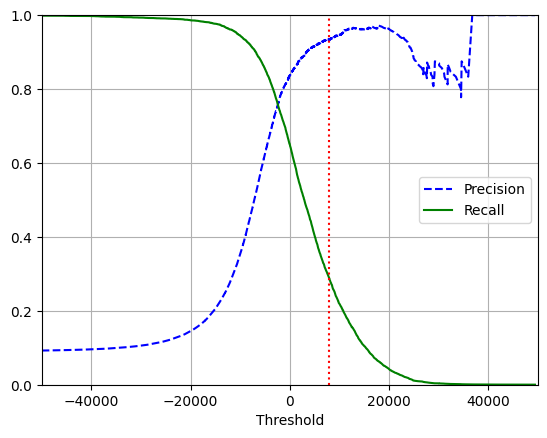

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

#### Curva ROC

La curva ROC muestra el ratio de verdaderos positivos (recall) contra el ratio de los falsos positivos.

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axhline(threshold, color = 'red', ls = 'dotted')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate (Recall)")
  plt.grid()
  plt.xlim([0, 1])
  plt.ylim([0, 1])

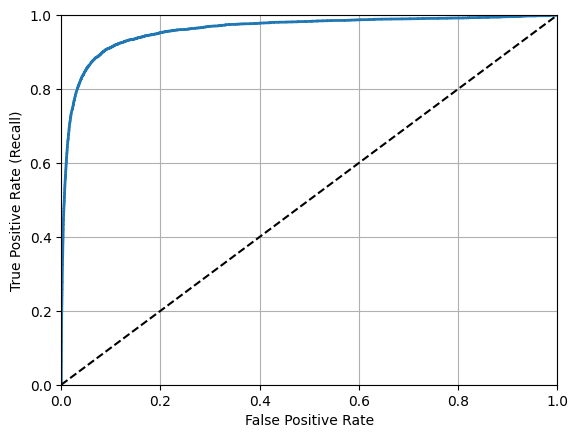

In [ ]:
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

#### Clasificador Random Forest

Se entrena un clasificador Random Forest para comparar con el anterior clasificador SGD.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_clf = RandomForestClassifier(random_state = 42)

In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = "predict_proba")

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

In [ ]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

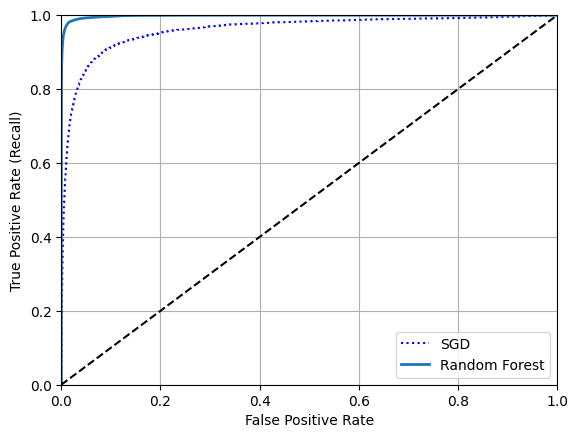

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

#### Clasificadores Multiclase

Los clasificadores multiclase o multinomial permiten clasificar entre varias clases.

Una estrategia para utilizar clasificadores binarios para problemas multiclase se conoce como one-versus-all (OvA). Según esta estrategia, para este caso se crearian 10 clasificadores binarios donde cada uno debe reconocer un digito entre los demas.

In [ ]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([digito])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [ ]:
some_digit_scores = sgd_clf.decision_function([digito])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [ ]:
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [ ]:
np.argmax(some_digit_scores)

3

In [ ]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
sgd_clf.classes_[5]

5

Otra estrategia es one-versus-one (OvO) donde se entrena un clasificador binario por cada par de dígitos para este caso.

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))

In [ ]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [ ]:
ovo_clf.predict([digito])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [ ]:
len(ovo_clf.estimators_)

45

In [ ]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
forest_clf.predict([digito])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [ ]:
forest_clf.predict_proba([digito])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.87365, 0.85835, 0.8689 ])

Al escalar los valores de entrada se puede incrementar el accuracy superando el 87% de precisión.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [ ]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.8983, 0.891 , 0.9018])

## **Cuarta parte - Afinar el modelo (fine tuning)**

### Análisis de errores

Visualizamos la matriz de confusión de manera numérica y gráfica para hallar la forma de mejorar el modelo.

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)

In [ ]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

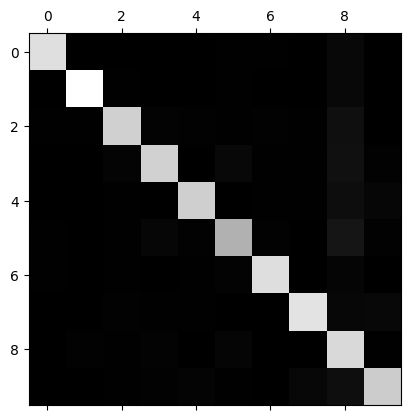

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

En base a la matriz, el enfoca se dirige hacia los errores. Se divide cada valor en la matriz por el número de imágenes en la correspondiente clase para poder comparar el los ratios de error en lugar del número absoluto de errores.

In [ ]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)

In [ ]:
norm_conf_mx = conf_mx / row_sums

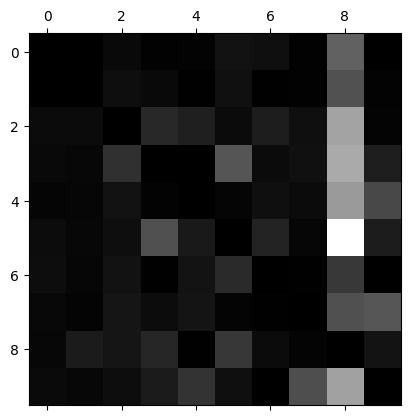

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

### Clasificación de múltiples etiquetas

Un sistema de clasificación que resulta en múltiples etiquetas binarias.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([digito])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)

In [ ]:
f1_score(y_multilabel, y_train_knn_pred, average = "macro")

0.976410265560605